In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns

In [2]:
YearinBusinessDF=pd.read_csv('data/ABSCS2018.AB1800CSA02-Data.csv')

In [ ]:
yb_df1 = YearinBusinessDF

In [4]:
yb_df1= yb_df1.loc[1:, ['YIBSZFI_LABEL']]
yb_df1['YIBSZFI_LABEL'] = yb_df1['YIBSZFI_LABEL'].replace({
    'Firms with less than 2 years in business': '0 to 2', 
    'Firms with 2 to 3 years in business': '2-3', 
    'Firms with 4 to 5 years in business': '4-5',
    'Firms with 6 to 10 years in business' : '6-10',
    'Firms with 11 to 15 years in business' : '11-15',
    'Firms with 16 or more years in business' : '16 plus',
})

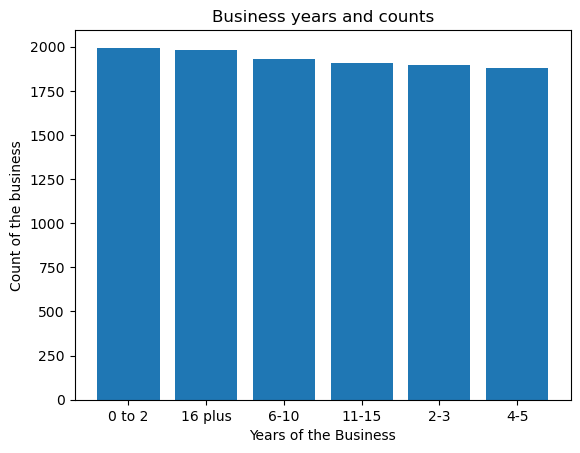

In [5]:
#### Filter the DataFrame to exclude rows with YIBSZFI_LABEL equal to 'Meaning of years in business code'
yb_df = yb_df1.loc[yb_df1['YIBSZFI_LABEL'] != 'Meaning of Years in business code']

# Plot the data using the filtered DataFrame
plt.bar(yb_df['YIBSZFI_LABEL'].value_counts().index, yb_df['YIBSZFI_LABEL'].value_counts().values)
plt.xlabel('Years of the Business')
plt.ylabel('Count of the business')
plt.title('Business years and counts')
plt.show()

In [ ]:
yb_df2 =YearinBusinessDF.loc[YearinBusinessDF['RACE_GROUP_LABEL'] != 'Meaning of Race code']
yb_df2[['RACE_GROUP_LABEL']].drop_duplicates()

In [ ]:
replacement_dict = {
    'American Indian and Alaska Native': 'Native American ', 
    'Native Hawaiian and Other Pacific Islander': 'Islander', 
    'Equally minority/nonminority': 'Minority',
    'Black or African American': 'African American',
    'Total': 'Unclassifiable'
}

yb_df2['RACE_GROUP_LABEL'] = yb_df2['RACE_GROUP_LABEL'].replace(replacement_dict)


In [ ]:
#Tree map on SEX_LABEL
#### male and female proportion on business in USA(exclude total from values)
import plotly.express as px
# count the number of value in the SEX_LABEL column, excluding the "Total" value
grouped_df = yb_df2[yb_df2['SEX_LABEL'] != 'Total']['SEX_LABEL'].value_counts().reset_index(name='Count')
grouped_df.rename(columns={'index': 'Sex'}, inplace=True)

# create treemap with the grouped data
fig = px.treemap(grouped_df, path=['Sex'], values='Count')

# show the plot
fig.show()
